In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/Thesis

Mounted at /content/drive
/content/drive/MyDrive/Thesis


In [1]:
# %%pycodestyle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Data Preparation

## Load DataFrame


In [2]:
# %%pycodestyle
df = pd.read_csv('creditcard.csv')
df.head()
# Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

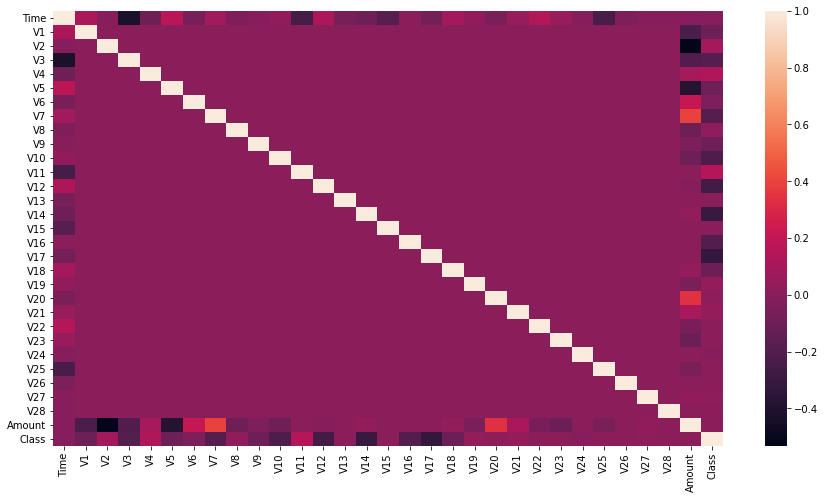

In [3]:
# %%pycodestyle
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df.corr())

[Text(0, 0, 'Genuine (0)'), Text(1, 0, 'Fraud (1)')]

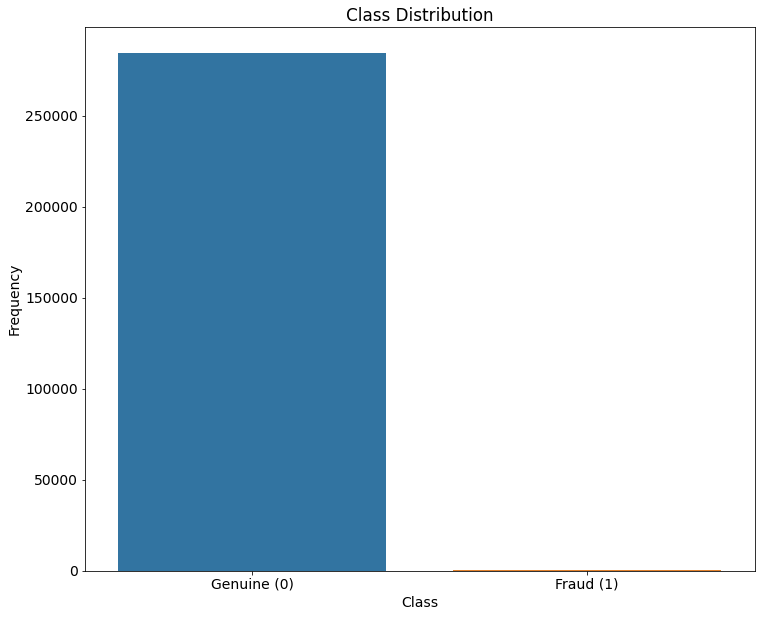

In [4]:
# %%pycodestyle
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(data=df, x='Class')
ax.set_title('Class Distribution')
ax.set(xlabel="Class", ylabel = "Frequency")
ax.set_xticklabels(['Genuine (0)', 'Fraud (1)'])

## Normalization ('Amount')


In [5]:
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']].values)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Split X, y

In [6]:
# %%pycodestyle
y = df[['Class']]
X = df.drop(['Class'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

## Random Oversampling

In [ ]:
oversampler = RandomOverSampler(sampling_strategy=0.1, random_state=14)
X_over_1, y_over_1 = oversampler.fit_resample(X_train,y_train)
y_over_1 = np.ravel(y_over_1)
print(Counter(y_over_1))

oversampler = RandomOverSampler(sampling_strategy=0.2, random_state=14)
X_over_2, y_over_2 = oversampler.fit_resample(X_train,y_train)
y_over_2 = np.ravel(y_over_2)
print(Counter(y_over_2))

oversampler = RandomOverSampler(sampling_strategy=0.3, random_state=14)
X_over_3, y_over_3 = oversampler.fit_resample(X_train,y_train)
y_over_3 = np.ravel(y_over_3)
print(Counter(y_over_3))

oversampler = RandomOverSampler(sampling_strategy=0.4, random_state=14)
X_over_4, y_over_4 = oversampler.fit_resample(X_train,y_train)
y_over_4 = np.ravel(y_over_4)
print(Counter(y_over_4))

oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=14)
X_over_5, y_over_5 = oversampler.fit_resample(X_train,y_train)
y_over_5 = np.ravel(y_over_5)
print(Counter(y_over_5))

oversampler = RandomOverSampler(sampling_strategy=0.6, random_state=14)
X_over_6, y_over_6 = oversampler.fit_resample(X_train,y_train)
y_over_6 = np.ravel(y_over_6)
print(Counter(y_over_6))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=14)
X_over_8, y_over_8 = oversampler.fit_resample(X_train,y_train)
y_over_8 = np.ravel(y_over_8)
print(Counter(y_over_8))

oversampler = RandomOverSampler(sampling_strategy=0.9, random_state=14)
X_over_9, y_over_9 = oversampler.fit_resample(X_train,y_train)
y_over_9 = np.ravel(y_over_9)
print(Counter(y_over_9))

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=14)
X_over, y_over = oversampler.fit_resample(X_train,y_train)
y_over = np.ravel(y_over)
print(Counter(y_over))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Random Undersampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=14)
X_under_1, y_under_1 = undersampler.fit_resample(X_train,y_train)
y_under_1 = np.ravel(y_under_1)
print(Counter(y_under_1))

undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=14)
X_under_2, y_under_2 = undersampler.fit_resample(X_train,y_train)
y_under_2 = np.ravel(y_under_2)
print(Counter(y_under_2))

undersampler = RandomUnderSampler(sampling_strategy=0.3, random_state=14)
X_under_3, y_under_3 = undersampler.fit_resample(X_train,y_train)
y_under_3 = np.ravel(y_under_3)
print(Counter(y_under_3))

undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=14)
X_under_4, y_under_4 = undersampler.fit_resample(X_train,y_train)
y_under_4 = np.ravel(y_under_4)
print(Counter(y_under_4))

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=14)
X_under_5, y_under_5 = undersampler.fit_resample(X_train,y_train)
y_under_5 = np.ravel(y_under_5)
print(Counter(y_under_5))

undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=14)
X_under_6, y_under_6 = undersampler.fit_resample(X_train,y_train)
y_under_6 = np.ravel(y_under_6)
print(Counter(y_under_6))

undersampler = RandomUnderSampler(sampling_strategy=0.7, random_state=14)
X_under_7, y_under_7 = undersampler.fit_resample(X_train,y_train)
y_under_7 = np.ravel(y_under_7)
print(Counter(y_under_7))

undersampler = RandomUnderSampler(sampling_strategy=0.8, random_state=14)
X_under_8, y_under_8 = undersampler.fit_resample(X_train,y_train)
y_under_8 = np.ravel(y_under_8)
print(Counter(y_under_8))

undersampler = RandomUnderSampler(sampling_strategy=0.9, random_state=14)
X_under_9, y_under_9 = undersampler.fit_resample(X_train,y_train)
y_under_9 = np.ravel(y_under_9)
print(Counter(y_under_9))

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=14)
X_under, y_under = undersampler.fit_resample(X_train,y_train)
y_under = np.ravel(y_under)
print(Counter(y_under))

Counter({0: 3510, 1: 351})
Counter({0: 1755, 1: 351})
Counter({0: 1170, 1: 351})
Counter({0: 877, 1: 351})
Counter({0: 702, 1: 351})
Counter({0: 585, 1: 351})
Counter({0: 501, 1: 351})
Counter({0: 438, 1: 351})
Counter({0: 390, 1: 351})
Counter({0: 351, 1: 351})


## SMOTE

In [ ]:
smote = SMOTE(sampling_strategy=0.1,random_state=14)
X_smote_1, y_smote_1 = smote.fit_resample(X_train, y_train)
y_smote_1 = np.ravel(y_smote_1)
print(Counter(y_smote_1))

smote = SMOTE(sampling_strategy=0.2,random_state=14)
X_smote_2, y_smote_2 = smote.fit_resample(X_train, y_train)
y_smote_2 = np.ravel(y_smote_2)
print(Counter(y_smote_2))

smote = SMOTE(sampling_strategy=0.3,random_state=14)
X_smote_3, y_smote_3 = smote.fit_resample(X_train, y_train)
y_smote_3 = np.ravel(y_smote_3)
print(Counter(y_smote_3))

smote = SMOTE(sampling_strategy=0.4,random_state=14)
X_smote_4, y_smote_4 = smote.fit_resample(X_train, y_train)
y_smote_4 = np.ravel(y_smote_4)
print(Counter(y_smote_4))

smote = SMOTE(sampling_strategy=0.5,random_state=14)
X_smote_5, y_smote_5 = smote.fit_resample(X_train, y_train)
y_smote_5 = np.ravel(y_smote_5)
print(Counter(y_smote_5))

smote = SMOTE(sampling_strategy=0.6,random_state=14)
X_smote_6, y_smote_6 = smote.fit_resample(X_train, y_train)
y_smote_6 = np.ravel(y_smote_6)
print(Counter(y_smote_6))

smote = SMOTE(sampling_strategy=0.7,random_state=14)
X_smote_7, y_smote_7 = smote.fit_resample(X_train, y_train)
y_smote_7 = np.ravel(y_smote_7)
print(Counter(y_smote_7))

smote = SMOTE(sampling_strategy=0.8,random_state=14)
X_smote_8, y_smote_8 = smote.fit_resample(X_train, y_train)
y_smote_8 = np.ravel(y_smote_8)
print(Counter(y_smote_8))

smote = SMOTE(sampling_strategy=0.9,random_state=14)
X_smote_9, y_smote_9 = smote.fit_resample(X_train, y_train)
y_smote_9 = np.ravel(y_smote_9)
print(Counter(y_smote_9))

smote = SMOTE(sampling_strategy='minority',random_state=14)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote = np.ravel(y_smote)
print(Counter(y_smote))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Tomek Links Removal

In [ ]:
tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X_train,y_train)
y_tomek = np.ravel(y_tomek)
Counter(y_tomek)

Counter({0: 198999, 1: 351})

## Hybrid

In [ ]:
# Applying tomek after smote
X_hybrid, y_hybrid = tomek.fit_resample(X_smote, y_smote)
y_hybrid = np.ravel(y_hybrid)
Counter(y_hybrid)

Counter({0: 198845, 1: 19901})

# XGBoost


In [15]:
XGB_PARAM={'subsample':[0.5,0.6,0.7,0.8],
           'colsample_bytree':[np.sqrt(30)/30,np.log2(30)/30]        
          }
RF_PARAM={'n_estimators': [100,150,200,250,300,350,400,450,500]}

In [17]:
clf = xgb.XGBClassifier(use_label_encoder=False, n_jobs=-1, verbosity=0)
search = GridSearchCV(clf, XGB_PARAM, cv=10, verbose=3, n_jobs=-1)

In [18]:
search.fit(X_train,np.ravel(y_train))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [23]:
best_subsample = search.best_params_['subsample']
print(best_subsample) #0.5
best_colsample = search.best_params_['colsample_bytree']
print(best_colsample) #sqrt(30)

0.5
0.18257418583505539


In [9]:
XGB_PARAM = {'max_depth':[3,4,5,6,7,8,9,10],
             'alpha':[0,0.0001,0.001,0.1]}

In [10]:
clf = xgb.XGBClassifier(use_label_encoder=False, n_jobs=-1, verbosity=0, subsample=0.5, colsample_bytree=np.sqrt(30)/30)
search = GridSearchCV(clf, XGB_PARAM, cv=10, verbose=3, n_jobs=-1)
search.fit(X_train,np.ravel(y_train))

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.18257418583505539,
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.5,
    

In [11]:
best_depth = search.best_params_['max_depth']
print(best_depth) #4
best_alpha = search.best_params_['alpha']
print(best_alpha) #0.0001

4
0.0001


In [12]:
XGB_PARAM = {'min_child_weight':[1,2,3,4,5,6,7,8,9,10],
             'gamma':[0,0.1,0.2,0.3,0.4,0.5]}

In [13]:
clf = xgb.XGBClassifier(use_label_encoder=False, 
                        n_jobs=-1, 
                        verbosity=0, 
                        subsample=0.5, 
                        colsample_bytree=np.sqrt(30)/30,
                        max_depth=4,
                        alpha=0.0001)
search = GridSearchCV(clf, XGB_PARAM, cv=10, verbose=3, n_jobs=-1)
search.fit(X_train,np.ravel(y_train))

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(alpha=0.0001, base_score=None,
                                     booster=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.18257418583505539,
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=4, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsampl

In [14]:
best_child_weight = search.best_params_['min_child_weight']
print(best_child_weight)# 0
best_gamma = search.best_params_['gamma']
print(best_gamma)# 1

1
0


In [16]:
XGB_PARAM = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]}

In [17]:
clf = xgb.XGBClassifier(use_label_encoder=False,
                        n_jobs=-1, 
                        verbosity=0,
                        learning_rate=0.1,
                        subsample=0.5, 
                        colsample_bytree=np.sqrt(30)/30,
                        max_depth=4,
                        alpha=0.0001,
                        min_child_weight=1,
                        gamma=0)
search = GridSearchCV(clf, XGB_PARAM, cv=10, verbose=3, n_jobs=-1)
search.fit(X_train,np.ravel(y_train))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(alpha=0.0001, base_score=None,
                                     booster=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.18257418583505539,
                                     gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.5,


In [18]:
best_estimator = search.best_params_['n_estimators']
print(best_estimator)

800


In [19]:
xgb = xgb.XGBClassifier(use_label_encoder=False,
                        n_jobs=-1, 
                        verbosity=3,
                        learning_rate=0.1,
                        subsample=0.5, 
                        colsample_bytree=np.sqrt(30)/30,
                        max_depth=4,
                        alpha=0.0001,
                        min_child_weight=1,
                        gamma=0,
                        n_estimators = best_estimator)
xgb.fit(X_train,y_train)
xgb.predict(X_test)

[09:15:58] DEBUG: ../src/gbm/gbtree.cc:155: Using tree method: 2
[09:15:58] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:15:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:15:58] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:15:58] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:15:58] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:15:59] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:15:59] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[09:1

[09:16:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[09:16:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[09:16:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[09:16:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[09:16:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[09:16:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned no

[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned no

[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:17] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned no

[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned no

[09:16:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[09:16:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned no

[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned no

[09:16:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:16:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned no

[09:16:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[09:16:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:16:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[09:16:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:45] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[09:16:45] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:45] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nod

[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[09:16:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, ma

[09:16:53] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:16:53] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[09:16:54] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes,

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
y_pred = xgb.predict(X_test)

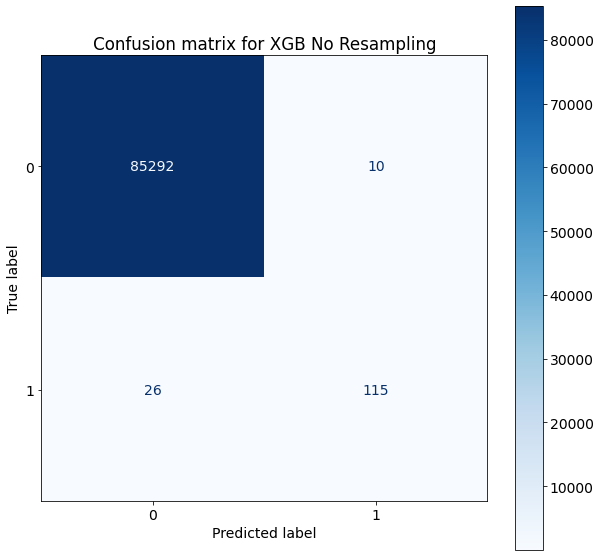

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion matrix for XGB No Resampling")
plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## P

In [22]:
precision_LR_no_resampling_1 = round(precision_score(y_test, y_pred),5)
print(precision_LR_no_resampling_1)
precision_LR_no_resampling_0 = round(precision_score(y_test, y_pred, pos_label=0),5)
print(precision_LR_no_resampling_0)
precision_LR_no_resampling_avg = round(precision_score(y_test, y_pred, average='micro'),5)
print(precision_LR_no_resampling_avg)

0.92
0.9997
0.99958


## R

In [23]:
recall_LR_no_resampling_1 = round(recall_score(y_test, y_pred),5)
print(recall_LR_no_resampling_1)
recall_LR_no_resampling_0 = round(recall_score(y_test, y_pred, pos_label=0),5)
print(recall_LR_no_resampling_0)
recall_LR_no_resampling_avg = round(recall_score(y_test, y_pred, average='micro'),5)
print(recall_LR_no_resampling_avg)

0.8156
0.99988
0.99958


## F1

In [24]:
f1_LR_no_resampling_1 = round(f1_score(y_test, y_pred),5)
print(f1_LR_no_resampling_1)
f1_LR_no_resampling_0 = round(f1_score(y_test, y_pred, pos_label=0),5)
print(f1_LR_no_resampling_0)
f1_LR_no_resampling_avg = round(f1_score(y_test, y_pred, average='micro'),5)
print(f1_LR_no_resampling_avg)

0.86466
0.99979
0.99958


In [25]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99970   0.99988   0.99979     85302
     Class 1    0.92000   0.81560   0.86466       141

    accuracy                        0.99958     85443
   macro avg    0.95985   0.90774   0.93223     85443
weighted avg    0.99956   0.99958   0.99957     85443



## PR

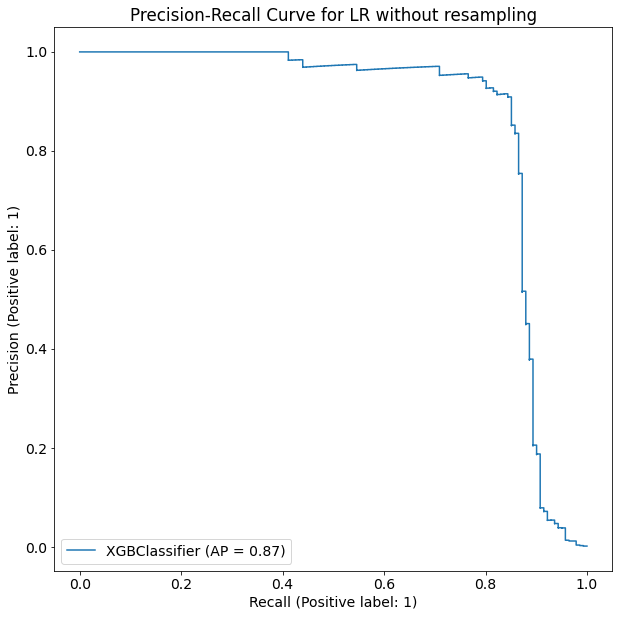

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR without resampling')
plot_precision_recall_curve(xgb, X_test, y_test, ax=ax)

## ROC

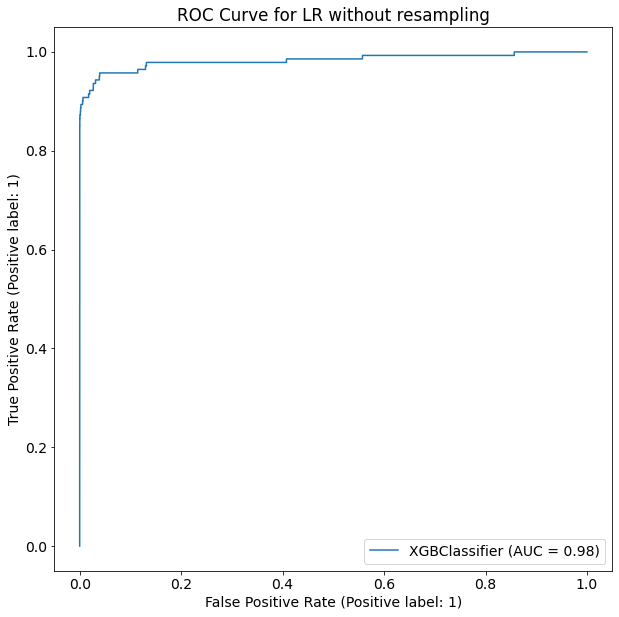

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR without resampling')
plot_roc_curve(xgb, X_test, y_test, ax=ax)